In [1]:
import os 
from cv2 import imread, normalize, resize
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
case_list = ['Case_1', 'Case_2','Case_3','Case_4']
Y_image = []
X_image = []

for case in case_list:
    path = 'C:/Users/user/Desktop/sem/simulation_data/SEM/' +  case # 폴더 경로
    folder_list = ['/80','/81','/82','/83','/84']


    for folder_name in folder_list:
        temp_path = path + folder_name
        os.chdir(temp_path) # 해당 폴더로 이동
        files = os.listdir(temp_path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음
        
        for file in files:
            if 'itr0' in file:
                f = imread(file, cv2.IMREAD_GRAYSCALE)
                image = f / 255
                X_image.append(image)
    
    path = 'C:/Users/user/Desktop/sem/simulation_data/Depth/' +  case # 폴더 경로
    for folder_name in folder_list:
        temp_path = path + folder_name
        os.chdir(temp_path) # 해당 폴더로 이동
        files = os.listdir(temp_path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음
        
        for file in files:
            f = imread(file, cv2.IMREAD_GRAYSCALE)
            image = f / 255
            Y_image.append(image)

In [3]:
for case in case_list:
    path = 'C:/Users/user/Desktop/sem/simulation_data/SEM/' +  case # 폴더 경로
    folder_list = ['/80','/81','/82','/83','/84']


    for folder_name in folder_list:
        temp_path = path + folder_name
        os.chdir(temp_path) # 해당 폴더로 이동
        files = os.listdir(temp_path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음
        
        for file in files:
            if 'itr1' in file:
                f = imread(file, cv2.IMREAD_GRAYSCALE)
                image = f / 255
                X_image.append(image)
    
    path = 'C:/Users/user/Desktop/sem/simulation_data/Depth/' +  case # 폴더 경로
    for folder_name in folder_list:
        temp_path = path + folder_name
        os.chdir(temp_path) # 해당 폴더로 이동
        files = os.listdir(temp_path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음
        
        for file in files:
            f = imread(file, cv2.IMREAD_GRAYSCALE)
            image = f / 255
            Y_image.append(image)

In [4]:
'''
file_name_list = []
depth_avg_list = []

with open('C:/Users/user/Desktop/sem/train/average_depth.csv', 'r') as file:
    file_read = csv.reader(file)
    for line in file:
        new_line = line.replace("\n", "")
        new_line2 = new_line.split(',')
        file_name_list.append(new_line2[0])	
        depth_avg_list.append(new_line2[1])
        
del file_name_list[0]
del depth_avg_list[0]

depth_list = ['Depth_110', 'Depth_120','Depth_130','Depth_140']

for depht in depth_list:
    path = 'C:/Users/user/Desktop/sem/train/SEM/' +  depht # 폴더 경로
    folder_list = os.listdir(path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음


    for folder_name in folder_list:
        temp_path = path + '/' + folder_name
        os.chdir(temp_path) # 해당 폴더로 이동
        files = os.listdir(temp_path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음
        
        temp_y_name = depht.lower() + '_' + folder_name
        
        for file in files:
            f = imread(file, cv2.IMREAD_GRAYSCALE)
            image = f / 255
            X_image.append(image)
            
            avg_depth = float(depth_avg_list[int(file_name_list.index(temp_y_name))])
            Y_image_temp = np.ones(shape=(f.shape[0],f.shape[1]), dtype=np.float64)
            Y_image.append(Y_image_temp * (avg_depth / 255))
'''
        

'\nfile_name_list = []\ndepth_avg_list = []\n\nwith open(\'C:/Users/user/Desktop/sem/train/average_depth.csv\', \'r\') as file:\n    file_read = csv.reader(file)\n    for line in file:\n        new_line = line.replace("\n", "")\n        new_line2 = new_line.split(\',\')\n        file_name_list.append(new_line2[0])\t\n        depth_avg_list.append(new_line2[1])\n        \ndel file_name_list[0]\ndel depth_avg_list[0]\n\ndepth_list = [\'Depth_110\', \'Depth_120\',\'Depth_130\',\'Depth_140\']\n\nfor depht in depth_list:\n    path = \'C:/Users/user/Desktop/sem/train/SEM/\' +  depht # 폴더 경로\n    folder_list = os.listdir(path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음\n\n\n    for folder_name in folder_list:\n        temp_path = path + \'/\' + folder_name\n        os.chdir(temp_path) # 해당 폴더로 이동\n        files = os.listdir(temp_path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음\n        \n        temp_y_name = depht.lower() + \'_\' + folder_name\n        \n        for file in files:\n            f = imread(file, cv2.IM

In [5]:
X_image = np.expand_dims(X_image, axis=-1)
X_image.shape

(173304, 72, 48, 1)

In [6]:
Y_image = np.expand_dims(Y_image, axis=-1)
Y_image.shape

(173304, 72, 48, 1)

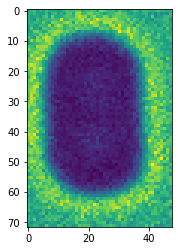

In [7]:
plt.imshow(X_image[2])
plt.show()

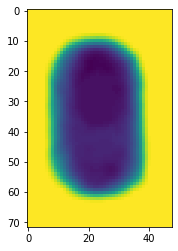

In [8]:
plt.imshow(Y_image[2])
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X_image, Y_image, test_size= 0.2)

In [10]:
x_train = np.array(x_train,dtype=np.float64)
y_train = np.array(y_train,dtype=np.float64)

x_val = np.array(x_val,dtype=np.float64)
y_val = np.array(y_val,dtype=np.float64)


path = 'C:/Users/user/Desktop/sem'
os.chdir(path)

checkpoint_path = "C:/Users/user/Desktop/sem/weight/unet/cp-{epoch:02d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only = True, save_freq='epoch',  monitor='val_loss', verbose=1, mode="min")

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                              patience=8)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, verbose=1, mode="min",
                              patience=6, min_lr=0.00001)

In [11]:
'''
from tensorflow.keras import backend as K

def my_mse(y_true, y_pred):
    #difference between true label and predicted label
    
    if float(y_true[0][0][0]) <= 1:
        mean_sqr_error = K.mean(K.square(y_pred - y_true))
        
    else:
        y_pred_avg= K.mean(y_pred) 
        y_true_avg = float(y_true[0][0][0]) / 255
        mean_sqr_error = K.square(y_true_avg-y_pred_avg)
        
    return mean_sqr_error

'''

'\nfrom tensorflow.keras import backend as K\n\ndef my_mse(y_true, y_pred):\n    #difference between true label and predicted label\n    \n    if float(y_true[0][0][0]) <= 1:\n        mean_sqr_error = K.mean(K.square(y_pred - y_true))\n        \n    else:\n        y_pred_avg= K.mean(y_pred) \n        y_true_avg = float(y_true[0][0][0]) / 255\n        mean_sqr_error = K.square(y_true_avg-y_pred_avg)\n        \n    return mean_sqr_error\n\n'

In [12]:
from keras_unet_collection import models

model = models.att_unet_2d((f.shape[0],f.shape[1],1), [64, 128, 256, 512], n_labels= 1, output_activation=None, batch_norm=True)

model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=1 * 1e-4))
history = model.fit(x_train, y_train, 
                         validation_data=(x_val, y_val),
                         epochs=50, batch_size = 64,
                         callbacks= [ earlystopping, reduce_lr, cp_callback])

Epoch 1/50
2167/2167 [==============================] - 952s 431ms/step - loss: 0.0023 - val_loss: 3.8984e-04

Epoch 00001: saving model to C:/Users/user/Desktop/sem/weight/unet\cp-01.ckpt
Epoch 2/50
2167/2167 [==============================] - 925s 427ms/step - loss: 3.7000e-04 - val_loss: 3.0636e-04

Epoch 00002: saving model to C:/Users/user/Desktop/sem/weight/unet\cp-02.ckpt
Epoch 3/50
2167/2167 [==============================] - 923s 426ms/step - loss: 2.9604e-04 - val_loss: 4.2652e-04

Epoch 00003: saving model to C:/Users/user/Desktop/sem/weight/unet\cp-03.ckpt
Epoch 4/50
2167/2167 [==============================] - 896s 413ms/step - loss: 2.5777e-04 - val_loss: 2.4729e-04

Epoch 00004: saving model to C:/Users/user/Desktop/sem/weight/unet\cp-04.ckpt
Epoch 5/50
2167/2167 [==============================] - 854s 394ms/step - loss: 2.1664e-04 - val_loss: 1.7888e-04

Epoch 00005: saving model to C:/Users/user/Desktop/sem/weight/unet\cp-05.ckpt
Epoch 6/50
2167/2167 [=================

In [13]:
def plot_model__hist(hist):
    plt.figure(figsize=(6,6))
    #plt.style.use("ggplot")
    plt.plot(hist.history['loss'], color='b', label="Training loss")
    plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
    plt.legend()
    plt.show()

In [30]:
from keras_unet_collection import models

max_point = 38

In [31]:
model = models.att_unet_2d((f.shape[0],f.shape[1],1), [64, 128, 256, 512], n_labels= 1, output_activation=None, batch_norm=True)
val_loss_history = history.history["val_loss"]
#max_point = val_loss_history.index(min(val_loss_history))


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1 * 1e-4),
        loss='MSE',
        metrics=['mse'])

if max_point > 8:
    model.load_weights(
        "C:/Users/user/Desktop/sem/weight/unet/cp-" + str(max_point+1) + ".ckpt"
    )
else:
    model.load_weights(
        "C:/Users/user/Desktop/sem/weight/unet/cp-0" + str(max_point+1) + ".ckpt"
    )

In [16]:
max_point

48

1084/1084 [==============================] - 63s 57ms/step - loss: 4.9518e-05 - mse: 4.9518e-05


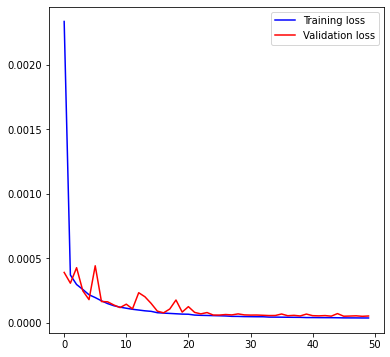

In [17]:
score = model.evaluate(x_val, y_val)

plot_model__hist(history)

In [18]:
decoded_images = model.predict(x_val)

In [19]:
distance_gap = decoded_images*255 - y_val*255
distance_gap_new = distance_gap.reshape(y_val.shape[0],-1)

avg_depth = np.mean(distance_gap_new,axis=1)

In [20]:
np.mean(avg_depth)

0.02767600909850632

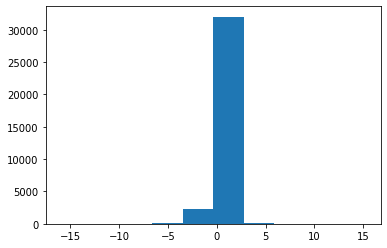

In [21]:
plt.hist(avg_depth)

plt.show()

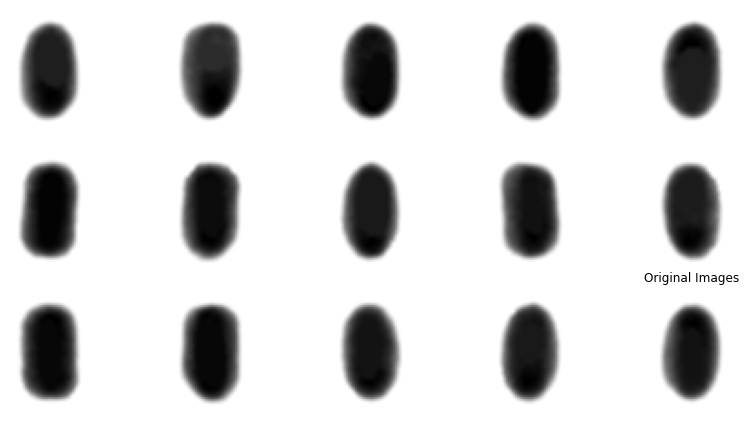

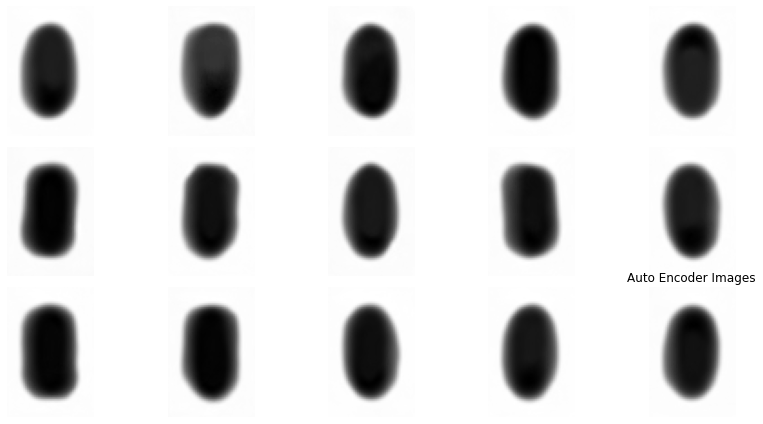

In [22]:
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 6)
for i in range(15):
    axes[i//5, i%5].imshow(y_val[i]*255, cmap='gray')
    axes[i//5, i%5].axis('off')
plt.tight_layout()
plt.title('Original Images')
plt.show()

fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 6)
for i in range(15):
    axes[i//5, i%5].imshow(decoded_images[i]*255, cmap='gray')
    axes[i//5, i%5].axis('off')
plt.tight_layout()
plt.title('Auto Encoder Images')
plt.show()

In [23]:
path = 'C:/Users/user/Desktop/sem/test/SEM' # 폴더 경로

test_image = []


os.chdir(path) # 해당 폴더로 이동
files = os.listdir(path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음
    
for file in files:
    f = imread(file, cv2.IMREAD_GRAYSCALE)
    image = f / 255
    test_image.append(image)

In [24]:
test_image = np.expand_dims(test_image, axis=-1)

In [32]:
decoded_images = model.predict(np.array(test_image, dtype=np.float64))

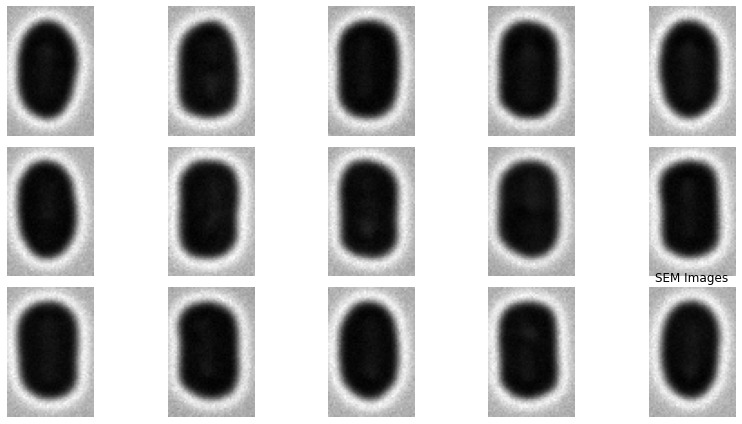

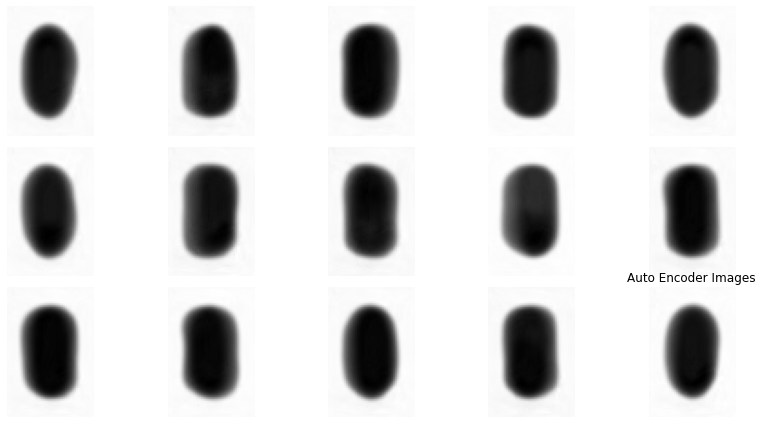

In [26]:
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 6)
for i in range(15):
    axes[i//5, i%5].imshow(test_image[i]*255, cmap='gray')
    axes[i//5, i%5].axis('off')
plt.tight_layout()
plt.title('SEM Images')
plt.show()

fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 6)
for i in range(15):
    axes[i//5, i%5].imshow(decoded_images[i]*255, cmap='gray')
    axes[i//5, i%5].axis('off')
plt.tight_layout()
plt.title('Auto Encoder Images')
plt.show()

In [33]:
import zipfile
def inference(decoded_images, files):
        
    os.makedirs('../../submission', exist_ok=True)
    os.chdir("../../submission")
    sub_imgs = []
    
    for path, pred_img in zip(files, decoded_images):
        cv2.imwrite(path, pred_img*255)
        sub_imgs.append(path)
        
    submission = zipfile.ZipFile("../submission.zip", 'w')
    for path in sub_imgs:
        submission.write(path)
    submission.close()
    
inference(decoded_images, files)

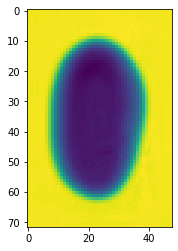

In [28]:
grayImg = cv2.imread('C:/Users/user/Desktop/sem/submission/000000.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(grayImg)
plt.show()

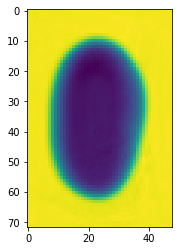

In [29]:
plt.imshow(decoded_images[0])
plt.show()

In [34]:
model.summary()

Model: "attunet_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 72, 48, 1)]  0                                            
__________________________________________________________________________________________________
attunet_down0_0 (Conv2D)        (None, 72, 48, 64)   576         input_3[0][0]                    
__________________________________________________________________________________________________
attunet_down0_0_bn (BatchNormal (None, 72, 48, 64)   256         attunet_down0_0[0][0]            
__________________________________________________________________________________________________
attunet_down0_0_activation (ReL (None, 72, 48, 64)   0           attunet_down0_0_bn[0][0]         
______________________________________________________________________________________